# Data can be found at

# LINK COMPAS WEBSITE DATA

# Setting Paths

Set the absolute paths to the data and the COMPAS post-processing routines
Everything afterwards should work self-consistently from whatever directory

In [1]:
#path to the data
pathCOMPASOutput   = '/home/cneijssel/Documents/Projects/Data/CosmicInt/'
#path to compasrepo which contains ther popsynth folder
pathPostProcessing = '/home/cneijssel/Documents/COMPASpop/popsynth/Papers/NeijsselEtAL/PostProcessing'


# Imports 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import sys


# Custom post-processing Scripts

In [3]:
sys.path.append(pathPostProcessing + '/2_CosmicIntegration')
#Given settings and redshifts returns rates (2D arrays) Loads the data
import ClassCosmicIntegrator  as CI 
# Quickly set ticks and labels in a nice preset font
import AxesLayout             as Layout

# Set the Cosmic Integrator

For a general way of doing the integration see

<a href="./2_CosmicIntegration/3_CallingTheFunction.html">
3 - calling  cosmic integration scripts
</a>

Here we set the integrator but loop over the prescriptions/types

In [4]:
minz = 0.
maxz = 6.
resz = 60
Data = CI.CosmicIntegrator(COMPASpath = pathCOMPASOutput,\
       minRedshift=minz,   maxRedshift=maxz, nrRedshiftBins=resz)

Remember to  self.setCOMPASDCOmask() and self.setCOMPASData()

cannot set 2D-array of rates
COMPAS data is empty (COMPAS.setCOMPASData) 


# The main Idea

We are going to plot the merger rate as a function of redshift.

We do this for each of the three double compact object types

Define the types and the corresponding colours we use in the plots

In [5]:
# General settings colours DCO types consistent with other notebooks
Types      = ['BBH', 'BHNS', 'BNS']
Colours    = ['midnightblue','mediumaquamarine','mediumvioletred' ]

### listing the variations

In [6]:
# Make the combinations that we want for the prescriptions
# You could see this as a 2D matrix where each column is a variation
# Wherever there is the None value, we do this as a reminder that 
# this variation does not depend on that prescription

#             Variation 1                  Variation 2                  Variation 3                    Variation 4
method     = ['logNormal'                ,'MZ_GSMF'                     ,'MZ_GSMF'                      , 'MZ_GSMF']
SFRs       = ['Neijssel et al. (2019)'   ,'Madau et al. (2014)'         ,'Madau et al. (2014)'          , 'Madau et al. (2014)']
logNormal  = ['Neijssel Phenomenological', None                         , None                          , None]
GSMFs      = [None                       , 'Panter et al. (2004) Single', 'Furlong et al. (2015) Single', 'Panter et al. (2004) Single']
MZs        = [None                       , 'Langer et al. (2006)'       , 'Langer et al. (2006)'        , 'Ma et al. (2015)']

#Plotting attributes
linestyles = ['-'                        , '--'                         , ':'                           , '-.']
labels     = ['Preferred model'          , 'Barrett et al. (2018) MSSFR', 'Furlong et al. (2015) Single', 'Ma et al. (2015)']

cm       = plt.get_cmap('viridis')
nColors  = 3+1  #want three colours for three variations (1 used in other plot later)
                    # dont want the brigthest colour hence I add a dummy value.
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

colours  =  [ 'k'                        ,mycolors[0]                   , mycolors[1]                   , mycolors[2]]


# The loop / plotting

BBH
rate BBH at redshift 0 for Preferred model  = 51.685999201678975
rate BBH at redshift 0 for Barrett et al. (2018) MSSFR  = 467.06630457875985
rate BBH at redshift 0 for Furlong et al. (2015) Single  = 589.8253977334174
rate BBH at redshift 0 for Ma et al. (2015)  = 64.50694749197189
BHNS
rate BHNS at redshift 0 for Preferred model  = 20.271866802303975
rate BHNS at redshift 0 for Barrett et al. (2018) MSSFR  = 104.00135968129148
rate BHNS at redshift 0 for Furlong et al. (2015) Single  = 99.77684806914661
rate BHNS at redshift 0 for Ma et al. (2015)  = 34.024126565920405
BNS
rate BNS at redshift 0 for Preferred model  = 62.016810914299576
rate BNS at redshift 0 for Barrett et al. (2018) MSSFR  = 155.3209365133575
rate BNS at redshift 0 for Furlong et al. (2015) Single  = 154.38991717855015
rate BNS at redshift 0 for Ma et al. (2015)  = 92.0827398675642


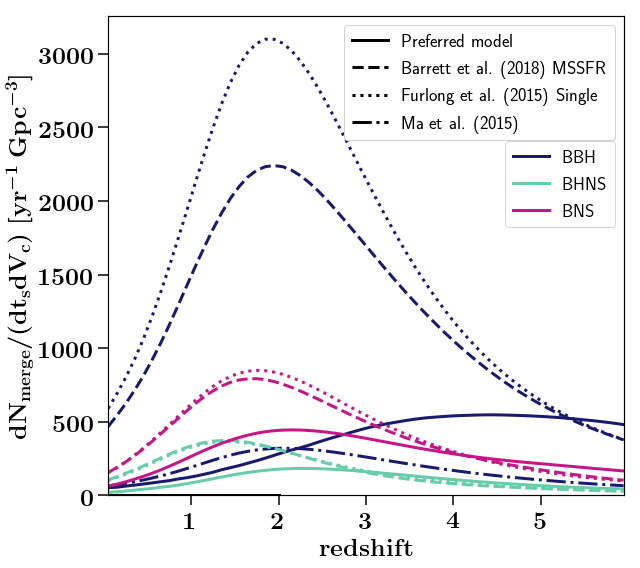

In [7]:
#Setting DCO types takes the longest so highest order in the for loop
#over types, then variations
fig, axes = plt.subplots(1,1,figsize=(9,8))
#Handles is for custom legend
handles1  = []
for nrT, Type in enumerate(Types):
    print(Type)
    #Get the mask (using the defaults within Hubbletime and pessimistic systems)
    Data.COMPAS.setCOMPASDCOmask(types=Type)
    #Get the data given the mask
    Data.COMPAS.setCOMPASData()
    #calculate birth times per system per redshift (this is independent of the variation)
    Data.setBirthTimesAnd2Darrays()
    
    #go over every variation, I use the labels to numerate
    for nrL, L in enumerate(labels):
        #set the MSSFR model
        Data.MSSFR.Zprescription         = method[nrL]
        Data.MSSFR.SFRprescription       = SFRs[nrL]
        Data.MSSFR.logNormalPrescription = logNormal[nrL]
        Data.MSSFR.GSMFprescription      = GSMFs[nrL]
        Data.MSSFR.ZMprescription        = MZs[nrL]
        #integrate
        Data.cosmologicalIntegration()
        
        #Sum up all the rates of each system at a single redshift (i.e. sum over the column)
        DCOperRedshift = np.sum(Data.PerSystemPerRedshift_ratesIntrinsic, axis=1)
        #get me the center redshift value of the shell (x-values for plotting)
        Redshifts      = Data.Shell_centerRedshift
        
        
        print('rate %s at redshift 0 for %s  = %s' \
              %(Type, L, DCOperRedshift[0]))
        
        #Given the number of variations I do not always want a label            
        #only want a label for DCO type  once when we have solid line
        
        #I don't want the Ma prescription for BHNSs and BNSs
        if ((nrL == 3) & (Type != 'BBH')):
            pass
        else:
            if nrL == 0:  #solid line I want the label and append it to custom legend
                label = Type
                ll    = True
            else:
                label = None
                ll    = False
            if ll:
                l = axes.plot(Redshifts, DCOperRedshift, label=label,lw=3.,\
                     c=Colours[nrT], linestyle=linestyles[nrL])
                handles1.extend(l)
            else:
                axes.plot(Redshifts, DCOperRedshift, label=label,lw=3.,\
                     c=Colours[nrT], linestyle=linestyles[nrL])
                
#https://stackoverflow.com/questions/39500265/manually-add-legend-items-python-matplotlib
first_legend = axes.legend(handles=handles1, loc='center right',  prop={'size':18}, ncol=1, bbox_to_anchor=(1., .65))   
axes.add_artist(first_legend) 

handles2 = []
for nrL, L in enumerate(labels):
    l = axes.plot([0,2], [-1,-1], c='k', linestyle=linestyles[nrL], label=L, lw=3.)
    handles2.extend(l)
second_legend = axes.legend(handles=handles2, loc=1,  prop={'size':18}, ncol=1)   
axes.add_artist(second_legend) 


nameX = r'$\rm redshift $'
nameY = r'$\rm dN_{merge}/(dt_{s}dV_{c})\ [ yr^{-1}\ Gpc^{-3}]  $'
axes = Layout.layoutAxes(axes, nameX=nameX, nameY=nameY)
axes.set_ylim(bottom=0)
axes.set_xlim(min(Redshifts), max(Redshifts))
plt.tight_layout()

#Say you want to use it in a presentation with a coloured background and 
#you do not want the white box. Put transparent to true
plt.savefig('./DCORateAsFunctionOfRedshift.png', dpi=300, transparent=False)
plt.show()
plt.close()

In [9]:
#I am done here see ya
Data.COMPAS.h5file.close()